In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
results_df = pd.read_csv("results/one-season/results.csv")
baseline_df = pd.read_csv("baselines/one-season.csv")

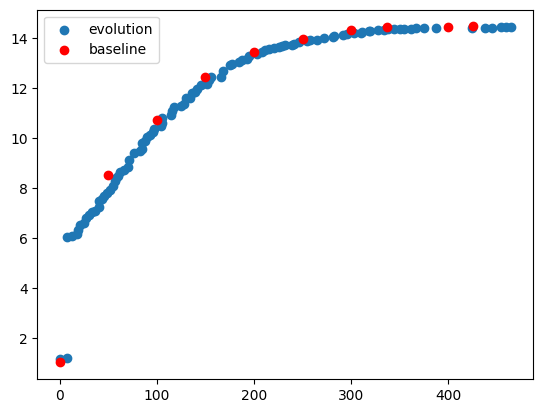

In [4]:
gen_df = results_df[results_df["gen"] == results_df["gen"].max()]
plt.scatter(gen_df["irrigation"], -1 * gen_df["yield"], label="evolution")
plt.scatter(baseline_df["irrigation"], baseline_df["yield"], color='red', label="baseline")
plt.legend()
plt.show()

## Examining the Results of Runs

In [6]:
from aquacrop import AquaCropModel, IrrigationManagement
import yaml

from evaluator import AquaCropEvaluator
from prescriptor import AquaCropPrescriptor

with open("config.yml", "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

evaluator = AquaCropEvaluator(config["eval_params"]["aquacrop_params"], n_jobs=1)
dummy_prescriptor = AquaCropPrescriptor(**config["prescriptor_params"])

model = AquaCropModel(sim_start_time=evaluator.sim_start_date,
                            sim_end_time=evaluator.sim_end_date,
                            weather_df=evaluator.weather_data,
                            soil=evaluator.soil,
                            crop=evaluator.crop,
                            initial_water_content=evaluator.init_wc,
                            irrigation_management=IrrigationManagement(irrigation_method=5))

results = evaluator.run_aquacrop(model, dummy_prescriptor)

In [8]:
print(results["final_stats"].columns)
print(results["water_flux"].columns)
print(results["water_storage"].columns)
print(results["crop_growth"].columns)

print(results["final_stats"].shape)
print(results["water_flux"].shape)
print(results["water_storage"].shape)
print(results["crop_growth"].shape)

print(results["final_stats"]["Seasonal irrigation (mm)"].max())
print(results["water_flux"]["IrrDay"].sum())

Index(['Season', 'crop Type', 'Harvest Date (YYYY/MM/DD)',
       'Harvest Date (Step)', 'Dry yield (tonne/ha)', 'Fresh yield (tonne/ha)',
       'Yield potential (tonne/ha)', 'Seasonal irrigation (mm)'],
      dtype='object')
Index(['time_step_counter', 'season_counter', 'dap', 'Wr', 'z_gw',
       'surface_storage', 'IrrDay', 'Infl', 'Runoff', 'DeepPerc', 'CR', 'GwIn',
       'Es', 'EsPot', 'Tr', 'TrPot'],
      dtype='object')
Index(['time_step_counter', 'growing_season', 'dap', 'th1', 'th2', 'th3',
       'th4', 'th5', 'th6', 'th7', 'th8', 'th9', 'th10', 'th11', 'th12'],
      dtype='object')
Index(['time_step_counter', 'season_counter', 'dap', 'gdd', 'gdd_cum',
       'z_root', 'canopy_cover', 'canopy_cover_ns', 'biomass', 'biomass_ns',
       'harvest_index', 'harvest_index_adj', 'DryYield', 'FreshYield',
       'YieldPot'],
      dtype='object')
(1, 8)
(184, 16)
(184, 15)
(184, 15)
685.2587622404099
685.2587622404099


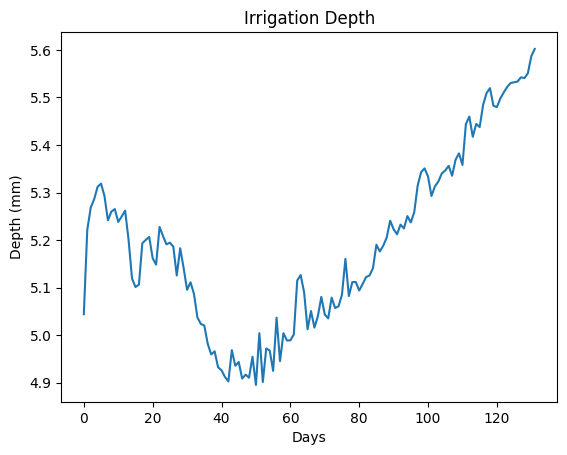

Bad pipe message: %s [b'\x88~\xf7\tK\x89\xa6HQ\xaa\xda\x97\x9e\xecicMo\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D']
Bad pipe message: %s [b'\x11\x98|\xc0`\xfa]z\xa5\xae\xa4\xcf9\xde\xf5\xaf\x8b\x0e\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9

In [11]:
plt.plot(results["depths"])
plt.title("Irrigation Depth")
plt.xlabel("Days")
plt.ylabel("Depth (mm)")
plt.show()